### From the Kaggle web site (https://www.kaggle.com/datasets) download the Suicide Rates Overview 1985 to 2016 dataset. The data set has 12 features and 27820 data points. We would like to develop a machine learned model to predict, given a feature vector, if theoutcome would be a suicide or not as a binary dependent variable (or if you like generate a numerical score as a regression problem). Load the data set in your model development framework and examine the features. Note that the Kaggle web site also has histograms that you can inspect. However, you might want to look at the data grouped by some other features. For example, how does the 'number of suicides / 100k' histogram look like from country to country. To answer the following questions, you have to think thoroughly and possibly attempt some pilot experiments. There is no right or wrong answer to some questions below but you have to convince me with your answers scholarly.

### 1. [10 pts] Due to the severity of this real-world crisis, what information would be the most important one to "machine learn"? Can it be learned?

I think the most important information we can try to learn is what demographics are most at risk for suicide.  Based on the amount of information, including age, gender, and statistics like country and GDP that may indicate economic success, we could make a prediction on the suicide rate of that population.  Suicides/100k would be the dependent variable.  While the prompt asked for a binary value if an individual would commit suicide, the reality is that the vast majority of people do not commit suicide, so effectively assigning a binary "suicide value" to an individual is impossible.  It is far more feasible, and impactful, to find at risk group's suicide rates, through the variable suicide/100k.  

### 2. [10 pts] Explain in detail how one should set up the problem? Would it be a regression or a classification problem? Any unsupervised approach to see some patterns exist or not?

Based on my answer to question 1, I'd say it is a regression problem.  You could use unsupervised learning to see if any clusters of individuals exist, which may not initially be apparent in the data.

### 3. [10 pts] What would be the dependent variable?

Suicides/100k


### 4. [10 pts] Rank the variables to find some strong correlations between the variables and the dependent variable you set.
### 5. [10 pts] Pre-process the dataset and list the major features you want to use. Note that not all features are crucial. For example, country-year variable is a derived feature and for a classifier it would not be necessary to include the year, the country and the country-year together. In fact, one must avoid adding a derived feature and the original at the same time.

I combined questions 4 and 5, because I find it hard to rank the variables for correlation without some preprocessing and analysis

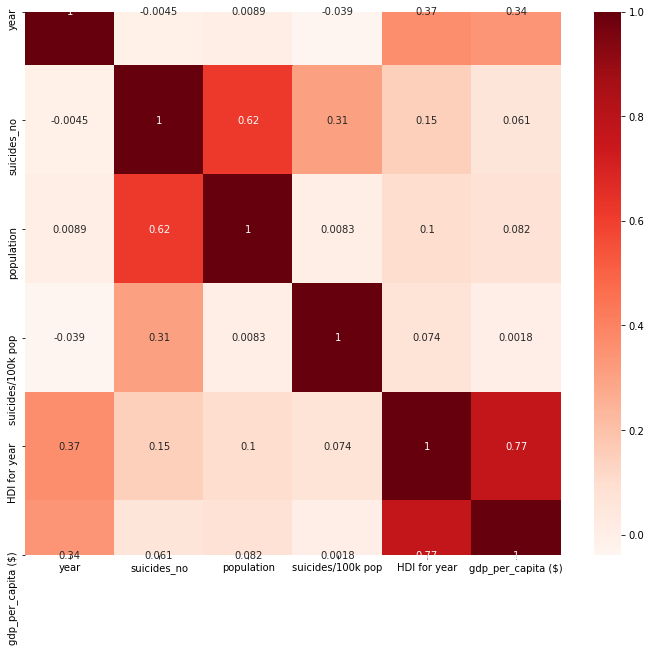

In [196]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##put path to your data here to interact with the rest of this notebook
df = pd.read_csv("C:/Users/petem/Downloads/Master.csv", )

plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [197]:
cor_target = abs(cor["suicides/100k pop"])
cor_target


year                  0.039037
suicides_no           0.306604
population            0.008285
suicides/100k pop     1.000000
HDI for year          0.074279
gdp_per_capita ($)    0.001785
Name: suicides/100k pop, dtype: float64

In [198]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


As shown above, when simply looking at a correlation without refining the data, all non numerical values are skipped.  Initially, I see low correlation between the numerical features, and the suicide rate, so I'll see if the non numerical data gives any better results.  

In [199]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder

X = df[['country', 'age', 'country-year', 'generation', 'sex']].values
nonNumerical_le = LabelEncoder()
for x in range(0, 5):
    X[:, x] = nonNumerical_le.fit_transform(X[:,x])
X

array([[0, 0, 0, 2, 1],
       [0, 2, 0, 5, 1],
       [0, 0, 0, 2, 0],
       ...,
       [100, 3, 2320, 3, 1],
       [100, 3, 2320, 3, 0],
       [100, 4, 2320, 0, 0]], dtype=object)

Now that I encoded my non numerical data, I'll see if it at all correlates to the suicide rate.

In [200]:
xDF = pd.DataFrame({'country': X[:, 0], 'age': X[:, 1], 'country-year': X[:, 2], 'generation': X[:, 3], 'sex': X[:, 4]})
xDF['suicides/100k pop'] = df['suicides/100k pop'].astype(int)
xDF = xDF.astype(int)
xDF.head()

,country,age,country-year,generation,sex,suicides/100k pop
0,0,0,0,2,1,6
1,0,2,0,5,1,5
2,0,0,0,2,0,4
3,0,5,0,1,1,4
4,0,1,0,0,1,3


In [201]:
cor = xDF.corr()
cor_target = abs(cor["suicides/100k pop"])
cor_target


country              0.054457
age                  0.188702
country-year         0.055540
generation           0.049164
sex                  0.391344
suicides/100k pop    1.000000
Name: suicides/100k pop, dtype: float64

based on the correlations, the most strongly correlated features were age, and sex, with sex having the strongest correlation.  This makes sense, as suicide is far more prevalent in men.

### 6. [10 pts] Do you think there are two levels (categories) of the dependent variable?

you could break it into 2 categories, as was discussed in the prompt, those being classifying if an individual will commit suicide, and using regression for suicide rate.  That being said, I don't think the classification category is worth exploring.

### 7. [10 pts] Can it be a regression model since the #suicide is numerical?

yes, I approached the model to start as a regression model to predit suicide rate as a numeric value.

### 8. [10 pts] Develop your model to solve your defined problem.

### 9. [10 pts] Evaluate (and report) the model performance using some of the techniques in module notebook (e.g. 80-20 split, 10-fold cross validation, etc.).

In [202]:
#combine original df and encoded df
df = df.drop(['country', 'sex', 'age', 'country-year', 'generation', 'suicides/100k pop', 'HDI for year'], axis = 1)
df[' gdp_for_year ($) '] = pd.to_numeric(df [' gdp_for_year ($) '].str.replace(',', ''))
result = df.join(xDF)
result.fillna(0)
result.head()

,year,suicides_no,population,gdp_for_year ($),gdp_per_capita ($),country,age,country-year,generation,sex,suicides/100k pop
0,1987,21,312900,2156624900,796,0,0,0,2,1,6
1,1987,16,308000,2156624900,796,0,2,0,5,1,5
2,1987,14,289700,2156624900,796,0,0,0,2,0,4
3,1987,1,21800,2156624900,796,0,5,0,1,1,4
4,1987,9,274300,2156624900,796,0,1,0,0,1,3


In [203]:
from sklearn.model_selection import train_test_split
#80 20 split
X = result.loc[:, result.columns != 'suicides/100k pop'].values
y = result.loc[:, result.columns == 'suicides/100k pop'].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=None)
X_test

array([[  1991,      0,    460, ...,   1172,      1,      0],
       [  1990,     24, 398531, ...,   1553,      2,      0],
       [  2010,      4,  24053, ...,    340,      2,      1],
       ...,
       [  1990,     17, 883364, ...,    647,      5,      0],
       [  2000,      0, 187983, ...,   1193,      4,      1],
       [  2005,     69, 201597, ...,    459,      5,      1]], dtype=int64)

In [204]:
#now lets set up a regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0,14.624516
1,6,2.175758
2,16,14.696879
3,2,-15.890968
4,12,16.819197
...,...,...
5559,28,24.654695
5560,116,25.694193
5561,1,1.872026
5562,0,19.708273


Even though we used basic linesr regression, it looks like some of the results are decent...while others are far off.

### 10. [10 pts] Using your model, what is the predicted value of 'number of suicides / 100k' for the input: "year=2000, generation=Generation X, age=20, gender=male"?

In [206]:
#replace values with encoded values
X_predict = [[2000,0,0,0,0,0,0, 0, 2, 1]]
y_predict = regressor.predict(X_predict)
print('predicted ' ,y_predict[0], ' suicides per 100k')

predicted  11.747858227784405  suicides per 100k
